# Monte Carlo Simulations with the Efficient Frontier

### Summary of Efficient Frontier
The Efficient fronter is a set of optimal portfolios that offer the highest expected return for a defined level of risk. It provides a great visualization on how to choose an optimal portfolio mathematically. _*Risk is defined as the assests actual return differing from our expected return.*_

"The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk." - Investopedia

# <center>Founder: Harry Markowitz</center>                                               
![image info](Harry_Markowitz.jfif)


Harry Markowitz introduced the efficient frontier theory in 1952 and later won a Nobel Memorial Prize in economics for the Modern Portfolio Theory in 1990. This theory is widely taught in every introductory Financial Course throughout the United States. His theory is written in detail in a paper: *Portfolio Selection* (1952).



# Summary

I will simulate weights on individual companies within a given portfolio to obtain an understanding on what return to risk is desired by the individual.

I picked 10 or so companies that are spread out in their corresponding Industries such that we have a relatively "low" correlation with each other.

# Companies
### Google | NVIDIA | Facebook 
### Wells Fargo | Pfizer | COKE  
### Disney | IMAX | Catepillar
### Southwest Airlines


In [1]:
import re
from io import StringIO
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np

# Obtaining the Data

### Companies of Interest (with their associated ticker)

| Technology | Finance | Health | Consumer | Entertainment | Industrials | Transportation |
| --- | --- | --- |--- | --- | --- | --- |
| (GOOG) Google | (WFC) Wells Fargo | (PFE) Pfizer | (COKE) Coke |(DIS) Disney | (CAT) Catepillar |(LUV) Southwest Airlines|
| (NVDA) NVIDIA | --- | --- | --- | (IMAX) IMAX | --- | --- |
| (FB) Facebook | --- | --- | --- | --- | --- | --- |

In [2]:
# Getting Data from 6 years back
# I will use the most recent 1 year to determine how well I would have done if I follow the efficient frontier.
# The market is open 252 times in a given year.
# I will get the adjusted close as my main data.
import pandas_datareader as pdr
from datetime import datetime


def get_historical_Data(tickers):
    """
    This function returns a pd dataframe with all of the adjusted closing information
    """
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data,pdr.get_data_yahoo(symbols=i, start=datetime(2013, 10, 11), end=datetime(2020, 10, 11)).iloc[:,5]], axis = 1)
        names.append(i)
    data.columns = names
    return data

#    The ticker names of the companies that we will be looking at.
ticks = ["GOOG", "NVDA", "FB", "WFC","DIS", "IMAX", "LUV", "PFE", "COKE", "CAT"]
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

(1762, 10)


,GOOG,NVDA,FB,WFC,DIS,IMAX,LUV,PFE,COKE,CAT
2020-10-05 00:00:00,1486.020020,136.265701,264.649994,24.011049,123.370003,11.06,38.490002,33.212723,241.626862,149.436417
2020-10-06 00:00:00,1453.439941,137.204605,258.660004,23.745895,120.930000,11.43,37.580002,32.688545,241.646729,147.528152
2020-10-07 00:00:00,1460.290039,139.476944,258.119995,24.364582,122.910004,11.37,38.590000,32.959671,238.758377,150.682602
2020-10-08 00:00:00,1485.930054,138.225891,263.760010,24.845785,123.089996,11.62,38.990002,33.339249,239.365936,152.522690
2020-10-09 00:00:00,1515.219971,137.466797,264.450012,24.845785,124.980003,11.62,39.730000,33.248875,241.318085,154.742477


In [3]:
# Saving the most recent year data such that we can compare...
# Called dT (DataTest)
dT = d.iloc[d.shape[0] - 252:,:] # Data test

# Update the "Training" or "data full"
d = d.iloc[:d.shape[0] - 252,:] # Data Train for the Simulation

print("Testing Data dimensions: ", dT.shape)
print("Training Data dimensions:", d.shape)

Testing Data dimensions:  (252, 10)
Training Data dimensions: (1510, 10)


In [4]:
dT # Test

,GOOG,NVDA,FB,WFC,DIS,IMAX,LUV,PFE,COKE,CAT
2019-10-11,1215.449951,46.346195,184.190002,46.229637,129.245667,20.879999,53.538975,31.372780,290.056671,121.142319
2019-10-14,1217.140015,46.480759,183.279999,46.285999,128.927551,20.680000,53.648197,31.537859,288.608429,121.123459
2019-10-15,1243.010010,48.932747,188.889999,47.075127,128.987198,20.549999,53.777283,31.711618,285.523346,123.623672
2019-10-16,1243.640015,48.394512,189.550003,46.586628,130.080658,20.459999,53.290741,31.572611,288.856445,122.831154
2019-10-17,1253.069946,48.414440,190.389999,46.605412,131.581650,21.080000,53.479401,31.676865,289.550781,124.604881
...,...,...,...,...,...,...,...,...,...,...
2020-10-05,1486.020020,136.265701,264.649994,24.011049,123.370003,11.060000,38.490002,33.212723,241.626862,149.436417
2020-10-06,1453.439941,137.204605,258.660004,23.745895,120.930000,11.430000,37.580002,32.688545,241.646729,147.528152
2020-10-07,1460.290039,139.476944,258.119995,24.364582,122.910004,11.370000,38.590000,32.959671,238.758377,150.682602
2020-10-08,1485.930054,138.225891,263.760010,24.845785,123.089996,11.620000,38.990002,33.339249,239.365936,152.522690


In [5]:
d # Train

,GOOG,NVDA,FB,WFC,DIS,IMAX,LUV,PFE,COKE,CAT
2013-10-11,434.366882,3.584757,49.110001,32.528511,60.191044,26.459999,14.317805,20.169544,58.807110,67.302696
2013-10-14,436.419189,3.638787,49.509998,32.779766,60.754677,26.850000,14.393013,20.611986,58.731205,67.797989
2013-10-15,439.358185,3.619994,49.500000,32.614883,60.400131,26.389999,14.289601,20.478554,58.807110,67.412766
2013-10-16,447.338257,3.664627,51.139999,33.140926,60.318310,26.700001,14.665641,20.928013,59.414341,67.821564
2013-10-17,442.735504,3.671675,52.209999,33.509953,60.381947,26.660000,15.051085,21.251059,60.211346,67.964073
...,...,...,...,...,...,...,...,...,...,...
2019-10-04,1209.000000,45.344463,180.449997,46.229637,129.494171,21.389999,52.416962,31.216393,304.738129,114.198341
2019-10-07,1207.680054,45.932552,179.679993,45.853863,130.120407,21.070000,52.665195,31.129519,299.391235,113.453003
2019-10-08,1189.130005,44.163322,177.750000,44.923813,127.704887,20.870001,52.655266,30.781990,292.576324,111.301872
2019-10-09,1202.310059,45.030499,179.850006,45.233837,128.559769,20.799999,53.112019,31.007877,292.467194,112.688789


# Understanding Returns

In [6]:
from scipy import stats
expected_returns_a = d.pct_change() # Daily returns from trading day to day...
expected_returns_a.columns = ticks # Setting the Column names 
expected_returns_aA = pd.DataFrame(expected_returns_a.mean()*250) # Annualizing the average rate of return
expected_returns_aA = expected_returns_aA.T # Transpose the values 

dar = d.pct_change().iloc[1:,:]+1 # dar = portfolio returns for each period (in this case day to day)
# 6 is the number of years I am working with (Note: Remember that earlier I've took out a year for training purposes.)
gar = pd.DataFrame(np.prod(dar)**(1/float(6)) - 1) # Geometric Average Rate of Return
# print(gar)
full_return_annual = (pd.concat([expected_returns_aA.T, gar], axis = 1))
# DO NOTE that Arithmetic Average Return is not usually an appropriate method
# for calculating the average return and telling others...

# Example: Returns are the following (50%, 30%, -50%) on a yearly basis (jan 1st to dec 31st)
# Average: (50 + 30 - 50) / 3 = 10% average rate of return. This is not a great "representation of how well you done"
# Example
# Start with initial value of $ 100 Dollars: 
# First year becomes 150. 
# Second Year becomes 190. 
# Third year becomes 97.5. You LOST money.

# Geometric Average: (also known as the Compounded annual growth rate)
# Using the example from above...
# ((1+ 0.5) * (1 + 0.3) * (0.5))^(1/3) - 1
# ((1.5)*(1.3)*(0.5))^(1/3) - 1
# .9916 - 1
# -0.0084
# or (-0.84) % average ANNUAL rate of return (more accurate gauge as to how well you've done.)

full_return_annual.columns = ["Average Arithmetic Returns", "Average Geometric Returns"] 
print("Expected Annual Returns ", expected_returns_aA)
print("dar", dar)
print("Full Annual Return", full_return_annual)

Expected Annual Returns         GOOG      NVDA        FB       WFC       DIS      IMAX       LUV  \
0  0.198358  0.500861  0.260655  0.076283  0.144291  0.007926  0.256635   

        PFE      COKE       CAT  
0  0.087328  0.319925  0.122425  
dar                 GOOG      NVDA        FB       WFC       DIS      IMAX  \
2013-10-14  1.004725  1.015072  1.008145  1.007724  1.009364  1.014739   
2013-10-15  1.006734  0.994835  0.999798  0.994970  0.994164  0.982868   
2013-10-16  1.018163  1.012330  1.033131  1.016129  0.998645  1.011747   
2013-10-17  0.989711  1.001923  1.020923  1.011135  1.001055  0.998502   
2013-10-18  1.137963  1.011516  1.038498  1.000000  1.010991  0.994749   
...              ...       ...       ...       ...       ...       ...   
2019-10-04  1.017822  1.003640  1.005965  1.015058  1.016543  0.990278   
2019-10-07  0.998908  1.012969  0.995733  0.991872  1.004836  0.985040   
2019-10-08  0.984640  0.961482  0.989259  0.979717  0.981436  0.990508   
2019-10-09  

# Equations Utilized

## Measuring the Adjusted Risk of Return
Measures the risk adjusted rate of return of a portfolio.
$$
\begin{aligned}
Sharpe Ratio = \frac{R_p - R_f}{\sigma_p}
\end{aligned}
$$
$\sigma_p$ = Standard Deviation of Portfolio \
$R_p$ = Return of Portfolio \
$R_f$ = Return of Risk Free Instrument
\
Rule of Thumb: 
Sharpe Ratio < 1 sub-optimal... There is most likely a better option \
Sharpe Ratio > 1 is acceptable \
Sharpe Ratio > 2 is VERY good \
Sharpe Ratio > 3 is EXCELLENT! 

# Volatility
$$
\begin{aligned}
\sum_{i=0}^N \sum_{j=0}^N {\sigma_{ij}}{X_i X}
\end{aligned}
$$
$X$ = Weights in Portfolio \
$\sigma_{ij}$ = Variance - Covariance Matrix

# Expected Return
$$
\begin{aligned}
\sum_{i=0}^N X_i \mu_i
\end{aligned}
$$
\
$X$ = Weights in Porfolio \
$\mu_i$ = Arithmetic Average Rate of Return for $i^{th}$ security

In [7]:
# Storing lists that retain returns, volatility, and weights of the Simulated portfolios
portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []

# This is what is going to be randomized
stock_weights = []

# Number of Indiviudal securities that will be a part of the portfolio
num_assets = len(ticks)
# Number of simulated iterations
num_portfolios = 100000

# Getting the covariance matrix
# Gets a percentage change one day to the next
daily_returns = d.pct_change()
# Converting daily returns to annual returns (standardizing to a year)
annual_returns = (daily_returns.mean() * 250) + 1

# Obtaining the covariance of annual
cov_daily = daily_returns.cov() # Covariance
cov_annual = cov_daily*250 # Covariance Annualized

print(annual_returns)

GOOG    1.198358
NVDA    1.500861
FB      1.260655
WFC     1.076283
DIS     1.144291
IMAX    1.007926
LUV     1.256635
PFE     1.087328
COKE    1.319925
CAT     1.122425
dtype: float64


In [8]:
# Setting seed of interpretability
np.random.seed(3)
# Filling in the lists with a simulated return, risk, and a given weight
# num_portfolios
for i in range(num_portfolios):
    # Randomly assign weights
    weights = np.random.random(num_assets)
    # Standardize the weights
    weights /= np.sum(weights)
    returns = (np.dot(weights, (annual_returns)))
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    """
    sharpe ratio: This calculates the risk adjusted return
    It suggests that adding assets to a portfolio that have low correlation can decrease portfolio risk without 
    sacrificing return 
    """
    sharpe = ((returns-1) / volatility)
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns-1)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)


In [9]:
# Storing the portfolio values
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatility,
             'Sharpe Ratio': sharpe_ratio}

# Add an additional entry to the portfolio such that each indivudal weight is incorporated for its corresponding company
for counter,symbol in enumerate(ticks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df

,Returns,Volatility,Sharpe Ratio,GOOG Weight,NVDA Weight,FB Weight,WFC Weight,DIS Weight,IMAX Weight,LUV Weight,PFE Weight,COKE Weight,CAT Weight
0,0.178703,0.172273,1.037326,0.117817,0.151475,0.062225,0.109267,0.191004,0.191719,0.026863,0.044330,0.011009,0.094290
1,0.181829,0.163057,1.115125,0.007585,0.115987,0.164814,0.070706,0.171697,0.150017,0.006089,0.141890,0.065823,0.105392
2,0.200293,0.172512,1.161041,0.059669,0.145874,0.092695,0.033013,0.114624,0.164221,0.064476,0.046712,0.081650,0.197066
3,0.219789,0.167687,1.310711,0.172284,0.118690,0.159369,0.149293,0.066724,0.016278,0.115341,0.098471,0.063824,0.039727
4,0.183750,0.165982,1.107046,0.093302,0.107628,0.061793,0.066970,0.105045,0.197504,0.134553,0.065064,0.063799,0.104342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.194760,0.164499,1.183957,0.023417,0.100606,0.149373,0.154120,0.074488,0.159411,0.057221,0.058428,0.151602,0.071334
99996,0.175594,0.154375,1.137446,0.038546,0.042940,0.052623,0.041529,0.091245,0.162005,0.171378,0.167278,0.142067,0.090388
99997,0.204151,0.172984,1.180177,0.034737,0.173086,0.129049,0.129066,0.000071,0.106695,0.022480,0.137896,0.079701,0.187218
99998,0.200551,0.167721,1.195743,0.139549,0.107646,0.161297,0.101648,0.067403,0.157787,0.046113,0.080258,0.113453,0.024847


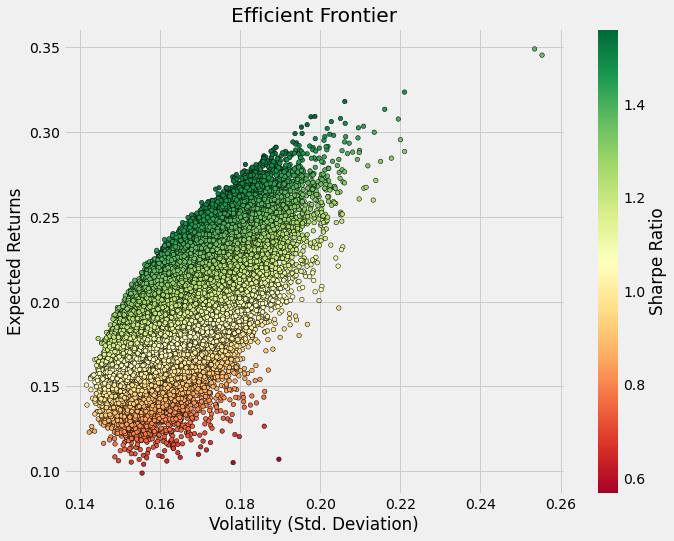

In [10]:
# PLotting the efficient frontier.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

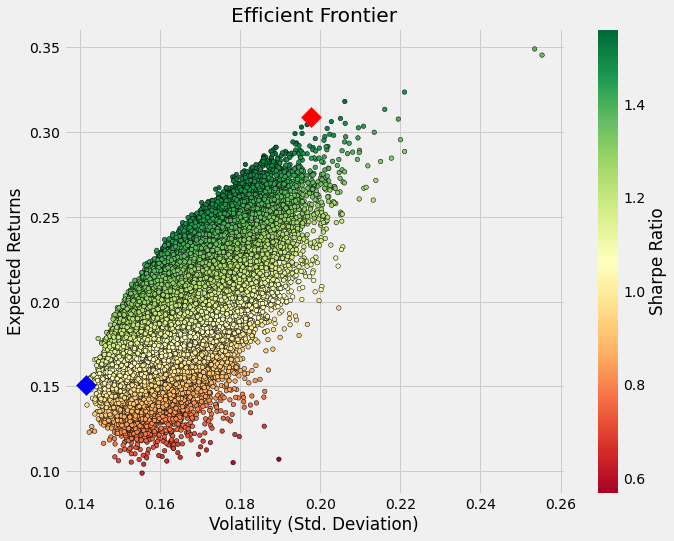

In [11]:
# Finding the Optimal Portfolio
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [12]:
# Additional Details
r_ef = pd.concat([min_variance_port.T,sharpe_portfolio.T], axis = 1)
r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values"]
print(r_ef)

              Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                           0.150794                  0.309052
Volatility                        0.141734                  0.197737
Sharpe Ratio                      1.063918                  1.562948
GOOG Weight                       0.035359                  0.106809
NVDA Weight                       0.018026                  0.250944
FB Weight                         0.011483                  0.038666
WFC Weight                        0.089905                  0.007228
DIS Weight                        0.197421                  0.060073
IMAX Weight                       0.040720                  0.005087
LUV Weight                        0.103566                  0.206534
PFE Weight                        0.299035                  0.006567
COKE Weight                       0.092985                  0.254782
CAT Weight                        0.111500                  0.063310


# If I were to invest 1,000 USD last year... what would I have now?

In [13]:
amount_invest = 1000
expected_return = pd.DataFrame(amount_invest * (1+r_ef.iloc[0,:]))
print("----------------------------------------------------------------")
print("                Expected Returns on my Portfolio")
print("----------------------------------------------------------------")
print(expected_return.T)
print("")
print("----------------------------------------------------------------")
print("If I invested", amount_invest,"USD on |", dT.index[0],"| I would have...")
actual_return = (dT.iloc[dT.shape[0]-1,:] - dT.iloc[0,:]) / ( dT.iloc[0,:])
# Multipling the weights to the price at the beginning of the year
beg_price = (dT.iloc[0,:])
end_price = dT.iloc[dT.shape[0]-1,:]
print("----------------------------------------------------------------")
# Weights derived from the Efficient Frontier Portfolio
# Weights for Minimum Risk
w = np.array(r_ef.iloc[3:,0])

percentage_change = (end_price - beg_price)/(beg_price)+1
print("Using the Portfolio Weights for Minimum Risk Return Portfolio")
money_left = sum(w * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ",round(money_left, 2))
print("")
print("----------------------------------------------------------------")
print("Using the Portfolio Weights Maximized Risk-Return Portfolio")
# Weights for Maxmimum Risk
w1 = np.array(r_ef.iloc[3:,1])

money_left1 = sum(w1 * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ", round(money_left1,2))
print("")


----------------------------------------------------------------
                Expected Returns on my Portfolio
----------------------------------------------------------------
         Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                   1150.793852               1309.052167

----------------------------------------------------------------
If I invested 1000 USD on | 2019-10-11 00:00:00 | I would have...
----------------------------------------------------------------
Using the Portfolio Weights for Minimum Risk Return Portfolio

    Starting balance $ 1000 : Ending with $  989.48

----------------------------------------------------------------
Using the Portfolio Weights Maximized Risk-Return Portfolio

    Starting balance $ 1000 : Ending with $  1450.86



In [ ]:
# Other models to take a look at...
# That try to predict a securities rate of return
# CAPM
# CCAPM
# ICAPM
# Fama French 3 factor, 4 factor, and 5 factor model.